In [1]:
import numpy as np
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/'
ana_corr_mr_39=np.loadtxt(main_direct+'/NSmassData/ligo_post/ana_mr_39.txt')
phe_corr_mr_39=np.loadtxt(main_direct+'/NSmassData/ligo_post/phenom_mr_modify_n39.txt')
ana_j1614=ana_corr_mr_39[34*10000:35*10000]
phe_j1614=phe_corr_mr_39[34*10000:35*10000]

In [7]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

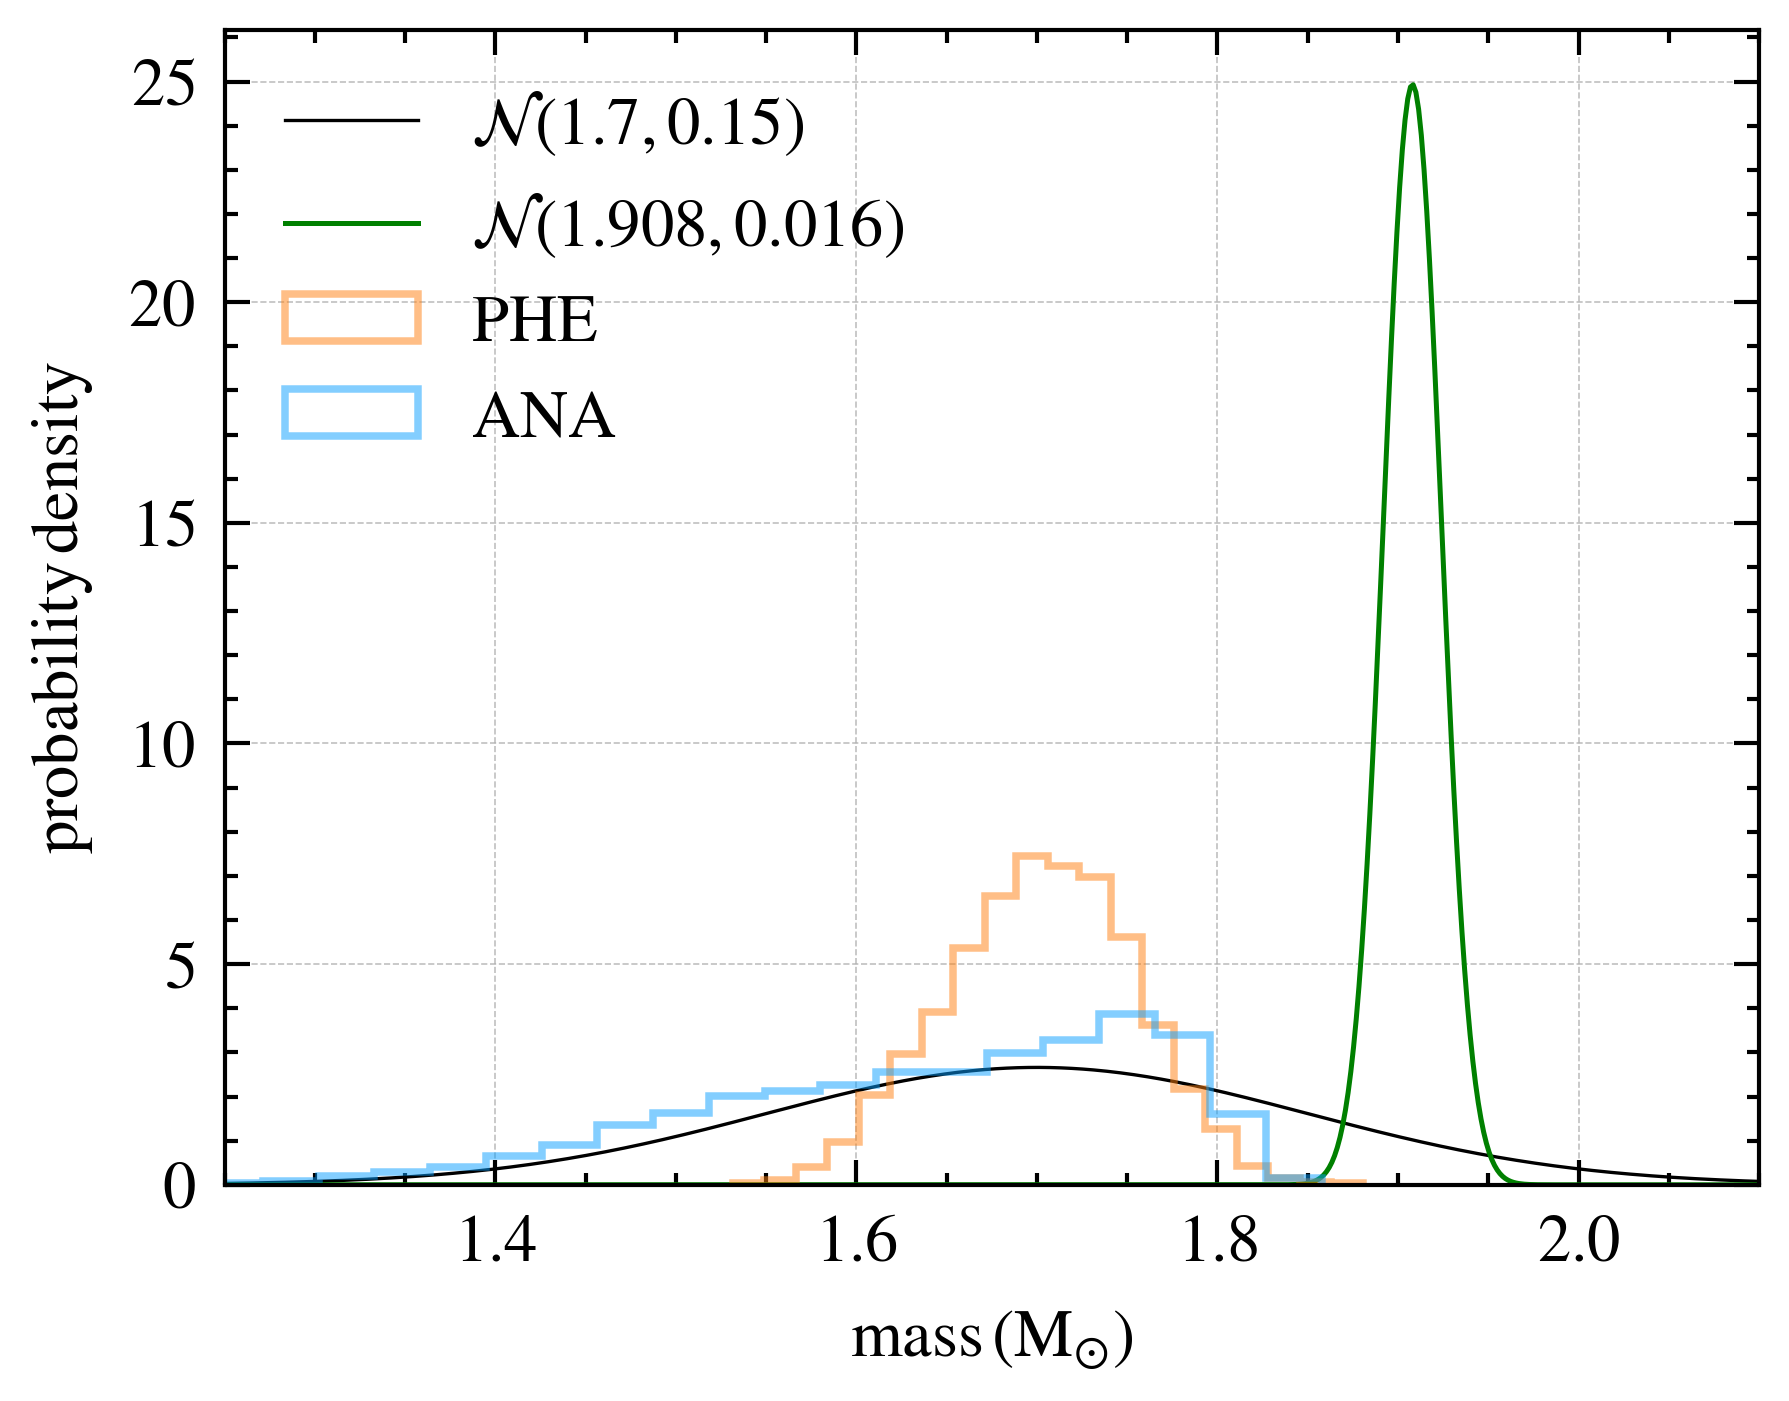

In [8]:
def G_fun(dataset, mu, sigma):
    return (np.exp(- (dataset - mu)**2 / (2 * sigma**2)) /\
        (2 * np.pi * sigma**2)**0.5)

plt.grid(which='major',linestyle='--',lw=0.2,alpha=0.8)


xx=np.linspace(1,2.5,1000)
plt.plot(xx,G_fun(xx, 1.7, 0.15),linestyle="-",color='k',lw=0.4,label=r'$\mathcal{N}(1.7,0.15)$')

plt.plot(xx,G_fun(xx, 1.908, 0.016),linestyle="-",color='green',lw=0.6,label=r'$\mathcal{N}(1.908,0.016)$')

plt.hist(phe_j1614,bins=20,histtype='step',density=True,color='#ff7f0e',fill=False,alpha=0.5,ls='-',lw=0.9,label=r'$\rm PHE$') 

plt.hist(ana_j1614,bins=20,histtype='step',density=True,color='#089FFF',fill=False,alpha=0.5,ls='-',lw=0.9,label=r'$\rm ANA$') 
#plt.hist(spin_up[i*5000:(i+1)*5000],bins=20,histtype='step',density=True,color='#089FFF',fill=False,alpha=0.,ls='-',lw=0.00,label=r'$\rm J1614-2230$') 


#fre_num_ta, x_edge_ta = np.histogram(tau[i*5000:(i+1)*5000],bins=40)
#plt.stairs(fre_num_ta/np.max(fre_num_ta),x_edge_ta,color='red',lw=0.3,ls='-') 
#plt.stairs(fre_num_ta/np.max(fre_num_ta),x_edge_ta,color='white',lw=0.3,alpha=0.001,ls='--')

plt.xlim(1.25,2.1)
plt.legend(loc='upper left')
plt.xlabel(r'$ \rm mass \,(M_{\odot})$')
plt.ylabel(r'$\rm probability\,density$')
plt.savefig('J1614_figs3_in1.pdf')